In [1]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv


model = tf.global_variables_initializer();

data = read_csv('silver gold data.csv', sep=',')

xy = np.array(data, dtype=np.float32)

x_data = xy[:, 1:-1]
y_data = xy[:, [-1]]

W = tf.Variable(tf.random_uniform([1]), name="weight")
b = tf.Variable(tf.random_uniform([1]), name="bias")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

rate = tf.Variable(0.0000005)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100000):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
0 1575664.9 [0.11769944] [0.99948615]
500 1249977.6 [9.1171] [1.5918701]
1000 991695.7 [17.131306] [2.1194816]
1500 786869.44 [24.268135] [2.5894122]
2000 624434.9 [30.623663] [3.007978]
2500 495618.3 [36.283424] [3.3808022]
3000 393462.25 [41.323578] [3.712892]
3500 312448.84 [45.811962] [4.008703]
4000 248202.78 [49.80895] [4.272212]
4500 197253.1 [53.36838] [4.506953]
5000 156848.05 [56.538155] [4.716073]
5500 124805.79 [59.360874] [4.9023805]
6000 99394.94 [61.874596] [5.068371]
6500 79243.125 [64.11314] [5.2162695]
7000 63262.332 [66.10657] [5.348057]
7500 50588.598 [67.88182] [5.465495]
8000 40538.113 [69.462685] [5.570156]
8500 32567.666 [70.87049] [5.6634407]
9000 26246.922 [72.12415] [5.7465925]
9500 21234.354 [73.24056] [5.820721]
10000 17259.174 [74.23475] [5.886812]
10500 14106.659 [75.12011] [5.945749]
11000 11606.647 [75.90853] [5.998312]
11500 9623.919 

98500 2026.679 [82.303185] [6.5549417]
99000 2026.6766 [82.303185] [6.555657]
99500 2026.6741 [82.303185] [6.556372]


In [2]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./saved.cpkt")
print('학습된 모델을 저장했습니다.')

학습된 모델을 저장했습니다.


In [36]:
%%writefile plot_hour2grade.py

import matplotlib.pyplot as plt  
%matplotlib inline

Overwriting plot_hour2grade.py


In [46]:
mx = np.mean(x_data)
my = np.mean(y_data)
print("x의 평균값:", mx)
print("y의 평균값:", my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x_data])

# 기울기 공식의 분자
def top(x_data, mx, y_data, my):
    d = 0
    for i in range(len(x_data)):
        d += (x_data[i] - mx) * (y_data[i] - my)
    return d
dividend = top(x_data, mx, y_data, my)

print("분모:", divisor)
print("분자:", dividend)

# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx*a)

# 출력으로 확인
print("기울기 a =", a)
print("y 절편 b =", b)

xline = np.arange(12, 18, 0.1)
yline = a * xline + b

x의 평균값: 15.1776285
y의 평균값: 1257.3325
분모: [127.06607]
분자: [4856.692]
기울기 a = [38.221783]
y 절편 b = [677.2165]


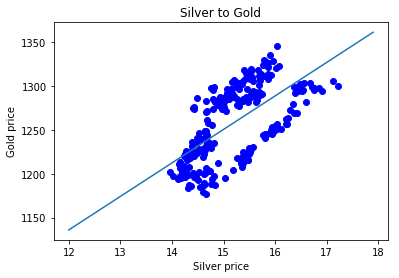

In [48]:
plt.figure()  
plt.plot(x_data, y_data, 'ob')  
plt.plot(xline, yline)
plt.title('Silver to Gold')
plt.xlabel('Silver price')
plt.ylabel('Gold price')
plt.show()